#                                      Ad Click Prediction

click through rate

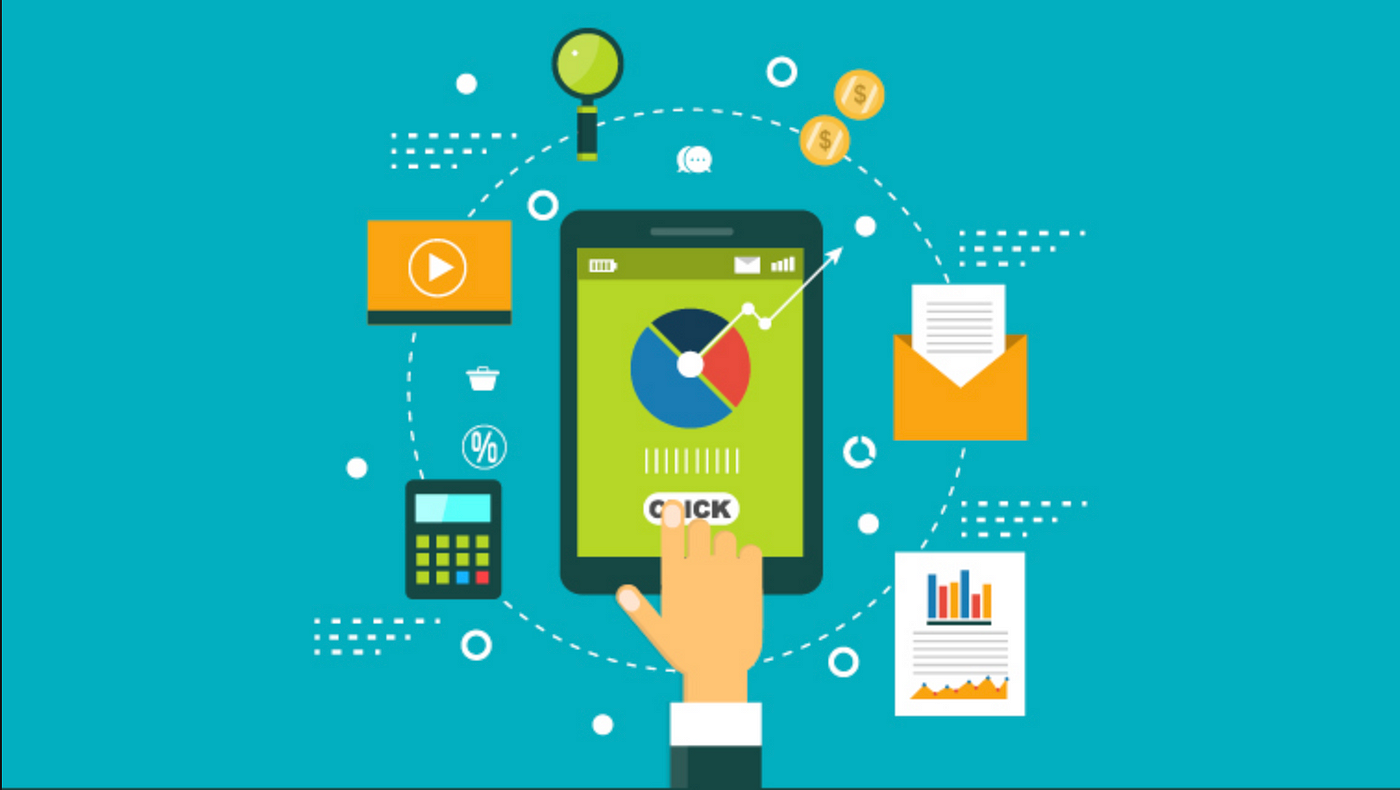

## Introduction


In the world of digital advertising, click prediction plays a pivotal role in determining the success of ad campaigns. Advertisers aim to serve their ads to users who are most likely to engage with them, which makes building an efficient ad click prediction machine learning system crucial.

Ad click prediction, or click-through rate (CTR) prediction, is a machine learning problem that helps determine the success of digital ad campaigns. It predicts the likelihood of a user clicking on an ad based on the ad and the context, such as the user's device, time of day, and search query. Advertisers use this information to show ads to users who are most likely to engage with them, and to price ads, position them, and drive customer engagement.

## Why Ad click is important ?
A company wants to know the CTR ( Click Through Rate ) in order to identify whether spending their money on digital advertising is worth or not.

A higher CTR represents more interest in that specific campaign, whereas a lower CTR can show that your ad may not be as relevant. High CTRs are important because they show that more people are clicking through to your website. Along with this high CTRs also help to get better ad position for less money on online platforms like Google, Bing etc.

Now we will discuss how to implement ad click prediction using Machine Learning Algorithm.



## Overview

For this project, a dataset sourced from GitHub is utilized, comprising information on 900 ads and whether customers clicked on them. The dataset includes various features that provide insights into user behavior and ad attributes. These features encompass:


Daily_Time_Spent_on_Site: The amount of time (in minutes) users spend on the website daily.

Age: The age of the user interacting with the ad.

Area_Income: The average income of the area where the user resides.

Daily_Internet_Usage: The amount of time (in minutes) users spend on the internet daily.

Ad_Topic_Line: The headline or topic of the advertisement.

City: The city where the user is located.

Gender: The gender of the user (e.g., male or female).

Country: The country where the user is located.

Timestamp: The timestamp indicating when the ad interaction occurred.

Clicked_on_Ad: A binary variable indicating whether the user clicked on the ad (1) or not (0).


The primary objective of this project is to train a machine learning model using this dataset to predict whether a customer will click on a particular ad. By analyzing the provided features and their relationship with ad clicks, the model aims to accurately forecast user behavior and enhance ad targeting strategies. Through this predictive modeling approach, advertisers can optimize ad placement and resource allocation, ultimately improving campaign effectiveness and maximizing ROI.








## Importing necessary libraries

In [11]:
#Basic Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#Sampling 
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
#Resampling
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

#feature engineering
from datetime import datetime as dt
from sklearn.preprocessing import StandardScaler

#Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve, r2_score , f1_score ,classification_report, confusion_matrix


from warnings import filterwarnings
filterwarnings('ignore')

### Set Options

In [12]:
# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
# pd.options.display.max_rows = None

## Loading the Dataset

In [13]:
clicks=pd.read_csv('advertising.csv')
clicks

Daily_Time_Spent_on_Site  Age  Area_Income  Daily_Internet_Usage  \
0                       68.95   35     61833.90                256.09   
1                       80.23   31     68441.85                193.77   
2                       69.47   26     59785.94                236.50   
3                       74.15   29     54806.18                245.89   
4                       68.37   35     73889.99                225.58   
..                        ...  ...          ...                   ...   
895                     80.99   26     35521.88                207.53   
896                     78.84   32     62430.55                235.29   
897                     77.36   41     49597.08                115.79   
898                     55.46   37     42078.89                108.10   
899                     35.66   45     46197.59                151.72   

                                    Ad_Topic_Line            City  Gender  \
0              Cloned 5thgeneration orchestration     Wrightburgh       0   
1              Monitored national standardization       West Jodi       1   
2                Organic bottom-line service-desk        Davidton       0   
3           Triple-buffered reciprocal time-frame  West Terrifurt       1   
4                   Robust logistical utilization    South Manuel       0   
..                                            ...             ...     ...   
895  Centralized clear-thinking Graphic Interface     Melissastad       1   
896            Optimized 5thgeneration moratorium   Gonzalezburgh       1   
897      Fully-configurable asynchronous firmware   Port Jennifer       0   
898                Exclusive systematic algorithm      Chrismouth       0   
899                   Exclusive cohesive intranet       Port Beth       0   

         Country       Timestamp  Clicked_on_Ad  
0        Tunisia   27/03/16 0:53              0  
1          Nauru   04/04/16 1:39              0  
2     San Marino  13/03/16 20:35              0  
3          Italy   10/01/16 2:31              0  
4        Iceland   03/06/16 3:36              0  
..           ...             ...            ...  
895      Belarus   10/06/16 3:56              0  
896       Taiwan   09/04/16 9:26              0  
897  El Salvador   26/02/16 6:00              1  
898       Taiwan  21/02/16 23:07              1  
899         Peru  29/04/16 14:08              1  

[900 rows x 10 columns]

### DATA DESCRIPTION

In [14]:
# Create a dictionary to store the information about the dataset
info_dict = {
    'Column': clicks.columns.tolist(),    # Store the column names in a list
    'Non-Null Count': clicks.count().tolist(), # Store the count of non-null values for each column
    'Dtype': clicks.dtypes.tolist(), # Store the data types of each column
    'Null_Percentage' : np.round(( 900 - clicks.count()) * 100 / 900) # Calculate the percentage of null values in each column    
}

# Create a DataFrame from the info_dict dictionary
Description = pd.DataFrame(info_dict).reset_index(drop = True)
Description

Column  Non-Null Count    Dtype  Null_Percentage
0  Daily_Time_Spent_on_Site             900  float64              0.0
1                       Age             900    int64              0.0
2               Area_Income             900  float64              0.0
3      Daily_Internet_Usage             900  float64              0.0
4             Ad_Topic_Line             900   object              0.0
5                      City             900   object              0.0
6                    Gender             900    int64              0.0
7                   Country             900   object              0.0
8                 Timestamp             900   object              0.0
9             Clicked_on_Ad             900    int64              0.0

# Exploratory Data Analysis

Exploratory Data Analysis (EDA), also known as Data Exploration, it is a step in the Data Analysis Process, where a number of techniques are used to better understand the dataset being used.

In this step, we will perform the below operations:

### 3.1) understanding Your Variables
        3.1.1) Head of the dataset
        3.1.2) The shape of the dataset
        3.1.3) List types of all columns
        3.1.4) Info of the dataset
        3.1.5) Summary of the dataset
        3.1.6) Finding the proportion of binary class of target varibale to make the data is balanced
        
### 3.2) Data Cleaning
        3.2.1) Checking the Duplicates
        3.2.2) Check the Null values

### 3.1.1 Head of the dataset

In [15]:
clicks.head()

Daily_Time_Spent_on_Site  Age  Area_Income  Daily_Internet_Usage  \
0                     68.95   35     61833.90                256.09   
1                     80.23   31     68441.85                193.77   
2                     69.47   26     59785.94                236.50   
3                     74.15   29     54806.18                245.89   
4                     68.37   35     73889.99                225.58   

                           Ad_Topic_Line            City  Gender     Country  \
0     Cloned 5thgeneration orchestration     Wrightburgh       0     Tunisia   
1     Monitored national standardization       West Jodi       1       Nauru   
2       Organic bottom-line service-desk        Davidton       0  San Marino   
3  Triple-buffered reciprocal time-frame  West Terrifurt       1       Italy   
4          Robust logistical utilization    South Manuel       0     Iceland   

        Timestamp  Clicked_on_Ad  
0   27/03/16 0:53              0  
1   04/04/16 1:39              0  
2  13/03/16 20:35              0  
3   10/01/16 2:31              0  
4   03/06/16 3:36              0

### 3.1.2. The shape of the dataset

In [16]:
clicks.shape

(900, 10)

### 3.1.3. List types of all columns

In [17]:
clicks.dtypes

Daily_Time_Spent_on_Site    float64
Age                           int64
Area_Income                 float64
Daily_Internet_Usage        float64
Ad_Topic_Line                object
City                         object
Gender                        int64
Country                      object
Timestamp                    object
Clicked_on_Ad                 int64
dtype: object

In [18]:
clicks.columns

Index(['Daily_Time_Spent_on_Site', 'Age', 'Area_Income',
       'Daily_Internet_Usage', 'Ad_Topic_Line', 'City', 'Gender', 'Country',
       'Timestamp', 'Clicked_on_Ad'],
      dtype='object')

### 3.1.4. Info of the dataset

In [19]:
clicks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily_Time_Spent_on_Site  900 non-null    float64
 1   Age                       900 non-null    int64  
 2   Area_Income               900 non-null    float64
 3   Daily_Internet_Usage      900 non-null    float64
 4   Ad_Topic_Line             900 non-null    object 
 5   City                      900 non-null    object 
 6   Gender                    900 non-null    int64  
 7   Country                   900 non-null    object 
 8   Timestamp                 900 non-null    object 
 9   Clicked_on_Ad             900 non-null    int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 70.4+ KB


### 3.1.5. Summary of the dataset

In [20]:
clicks.describe()

Daily_Time_Spent_on_Site         Age   Area_Income  \
count                900.000000  900.000000    900.000000   
mean                  65.425800   35.903333  55315.072767   
std                   15.712563    8.744462  13376.323458   
min                   32.600000   19.000000  13996.500000   
25%                   52.160000   29.000000  47494.787500   
50%                   68.945000   35.000000  57631.345000   
75%                   78.610000   41.000000  65666.300000   
max                   91.430000   61.000000  79484.800000   

       Daily_Internet_Usage      Gender  Clicked_on_Ad  
count            900.000000  900.000000     900.000000  
mean             180.702344    0.483333       0.487778  
std               43.823397    0.500000       0.500129  
min              104.780000    0.000000       0.000000  
25%              139.245000    0.000000       0.000000  
50%              184.555000    0.000000       0.000000  
75%              219.720000    1.000000       1.000000  
max              269.960000    1.000000       1.000000

## Summary statistics

#### Daily_Time_Spent_on_Site: 

Users spend an average of 65.43 minutes on the site, with a standard deviation of 15.71 minutes.

#### Age: 

The average age of users is 35.90 years, with a standard deviation of 8.74 years.

#### Area_Income: 

The mean area income is $55,315.07, with a standard deviation of $13,376.32.

#### Daily_Internet_Usage: 

On average, users consume 180.70 MB of internet daily, with a standard deviation of 43.82 MB.

#### Gender: 

This categorical feature indicates the gender of users, with approximately equal distribution between categories.

#### Clicked_on_Ad: 

Around 48.78% of users clicked on the ad, with a standard deviation of 0.50, indicating a near-equal distribution between clicks and non-clicks.

### 3.1.6. Finding the proportion of binary class of target varibale to check whether the data is balanced

In [21]:
clicks.Clicked_on_Ad.value_counts()

Clicked_on_Ad
0    461
1    439
Name: count, dtype: int64

In [22]:
clicks.Clicked_on_Ad.value_counts(normalize=True)*100

Clicked_on_Ad
0    51.222222
1    48.777778
Name: proportion, dtype: float64

above data is balanced

## 3.2 Data Cleaning

### 3.2.1. Checking the Duplicates

In [23]:
clicks[clicks.duplicated]

Empty DataFrame
Columns: [Daily_Time_Spent_on_Site, Age, Area_Income, Daily_Internet_Usage, Ad_Topic_Line, City, Gender, Country, Timestamp, Clicked_on_Ad]
Index: []

No duplicates

### 3.2.2 Checking null values

In [24]:
clicks.isnull().sum()

Daily_Time_Spent_on_Site    0
Age                         0
Area_Income                 0
Daily_Internet_Usage        0
Ad_Topic_Line               0
City                        0
Gender                      0
Country                     0
Timestamp                   0
Clicked_on_Ad               0
dtype: int64

### The data is clean, with no duplicate or null values observed

<a id='Feature_Eng'></a>
### Feature Engineering

We will extract date time features from the variable 'Timestamp'.

For feature engineering, we do the following:<br><br>
                        1. Feature addition <br>
                        2. Drop the redundant variables

**1. Add new variables**

We will extract new features from variable `date_time_of_pickup`.

In [25]:
# Convert timestamp to datetime object
clicks['Timestamp'] = pd.to_datetime(clicks['Timestamp'],format= '%d/%m/%y %H:%M')

clicks=clicks.assign(hour=clicks.Timestamp.dt.hour,
                    day=clicks.Timestamp.dt.day,
                    month=clicks.Timestamp.dt.month,
                    year=clicks.Timestamp.dt.year,
                    dayofweek=clicks.Timestamp.dt.dayofweek,
                    minutes=clicks.Timestamp.dt.minute)
clicks

Daily_Time_Spent_on_Site  Age  Area_Income  Daily_Internet_Usage  \
0                       68.95   35     61833.90                256.09   
1                       80.23   31     68441.85                193.77   
2                       69.47   26     59785.94                236.50   
3                       74.15   29     54806.18                245.89   
4                       68.37   35     73889.99                225.58   
..                        ...  ...          ...                   ...   
895                     80.99   26     35521.88                207.53   
896                     78.84   32     62430.55                235.29   
897                     77.36   41     49597.08                115.79   
898                     55.46   37     42078.89                108.10   
899                     35.66   45     46197.59                151.72   

                                    Ad_Topic_Line            City  Gender  \
0              Cloned 5thgeneration orchestration     Wrightburgh       0   
1              Monitored national standardization       West Jodi       1   
2                Organic bottom-line service-desk        Davidton       0   
3           Triple-buffered reciprocal time-frame  West Terrifurt       1   
4                   Robust logistical utilization    South Manuel       0   
..                                            ...             ...     ...   
895  Centralized clear-thinking Graphic Interface     Melissastad       1   
896            Optimized 5thgeneration moratorium   Gonzalezburgh       1   
897      Fully-configurable asynchronous firmware   Port Jennifer       0   
898                Exclusive systematic algorithm      Chrismouth       0   
899                   Exclusive cohesive intranet       Port Beth       0   

         Country           Timestamp  Clicked_on_Ad  hour  day  month  year  \
0        Tunisia 2016-03-27 00:53:00              0     0   27      3  2016   
1          Nauru 2016-04-04 01:39:00              0     1    4      4  2016   
2     San Marino 2016-03-13 20:35:00              0    20   13      3  2016   
3          Italy 2016-01-10 02:31:00              0     2   10      1  2016   
4        Iceland 2016-06-03 03:36:00              0     3    3      6  2016   
..           ...                 ...            ...   ...  ...    ...   ...   
895      Belarus 2016-06-10 03:56:00              0     3   10      6  2016   
896       Taiwan 2016-04-09 09:26:00              0     9    9      4  2016   
897  El Salvador 2016-02-26 06:00:00              1     6   26      2  2016   
898       Taiwan 2016-02-21 23:07:00              1    23   21      2  2016   
899         Peru 2016-04-29 14:08:00              1    14   29      4  2016   

     dayofweek  minutes  
0            6       53  
1            0       39  
2            6       35  
3            6       31  
4            4       36  
..         ...      ...  
895          4       56  
896          5       26  
897          4        0  
898          6        7  
899          4        8  

[900 rows x 16 columns]

In [26]:
click=clicks.copy(deep=True)

In [27]:
click.drop('Timestamp',axis=1,inplace=True)

In [28]:
click.head(2)

Daily_Time_Spent_on_Site  Age  Area_Income  Daily_Internet_Usage  \
0                     68.95   35     61833.90                256.09   
1                     80.23   31     68441.85                193.77   

                        Ad_Topic_Line         City  Gender  Country  \
0  Cloned 5thgeneration orchestration  Wrightburgh       0  Tunisia   
1  Monitored national standardization    West Jodi       1    Nauru   

   Clicked_on_Ad  hour  day  month  year  dayofweek  minutes  
0              0     0   27      3  2016          6       53  
1              0     1    4      4  2016          0       39

### Data Visualization

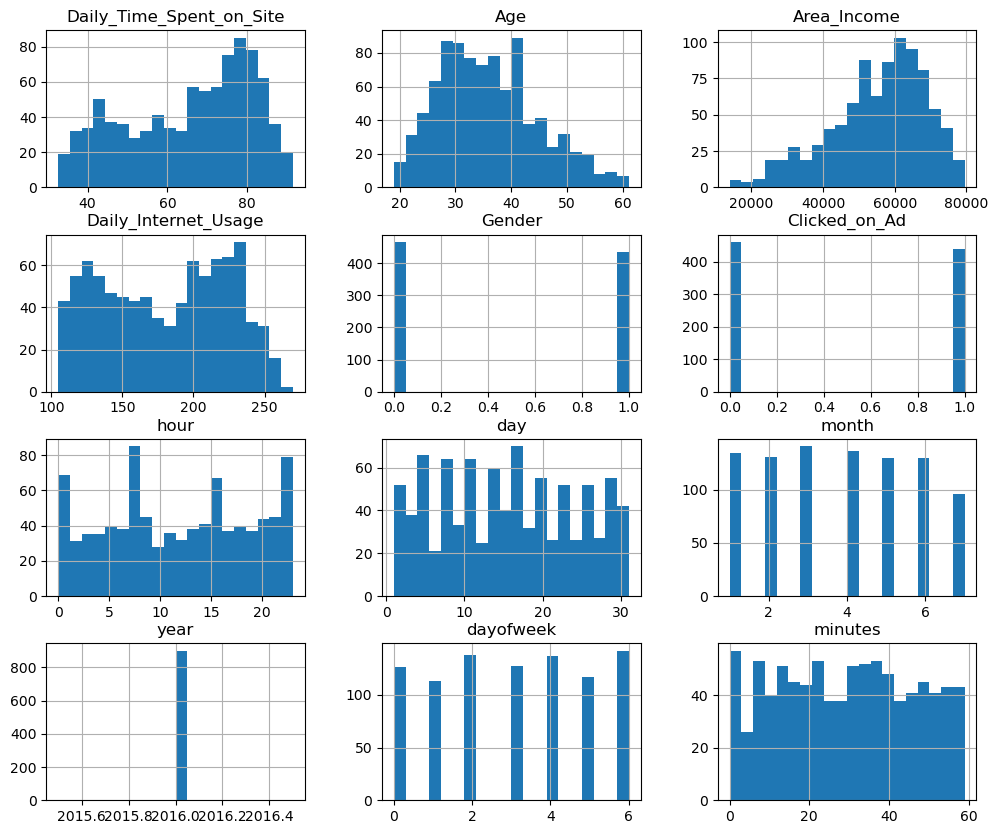

In [29]:
#plotting histogram of all numerical features
click.hist(figsize=(12, 10), bins=20)
plt.show()

### Analyzing numerical features

In [30]:
click.head(1)

Daily_Time_Spent_on_Site  Age  Area_Income  Daily_Internet_Usage  \
0                     68.95   35      61833.9                256.09   

                        Ad_Topic_Line         City  Gender  Country  \
0  Cloned 5thgeneration orchestration  Wrightburgh       0  Tunisia   

   Clicked_on_Ad  hour  day  month  year  dayofweek  minutes  
0              0     0   27      3  2016          6       53

Daily_Time_Spent_on_Site
Axes(0.125,0.11;0.775x0.77)


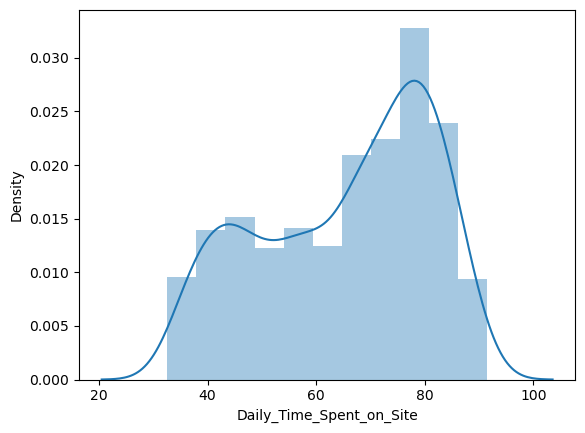

Axes(0.125,0.11;0.775x0.77)


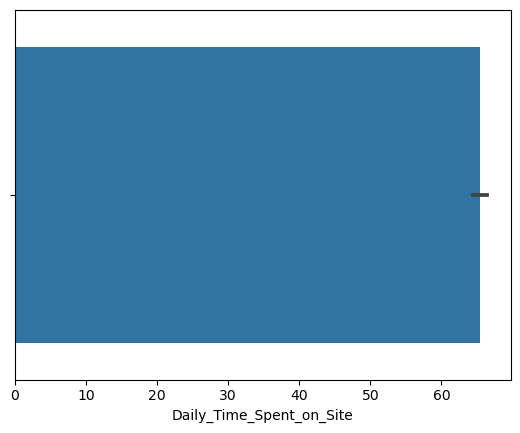

Age
Axes(0.125,0.11;0.775x0.77)


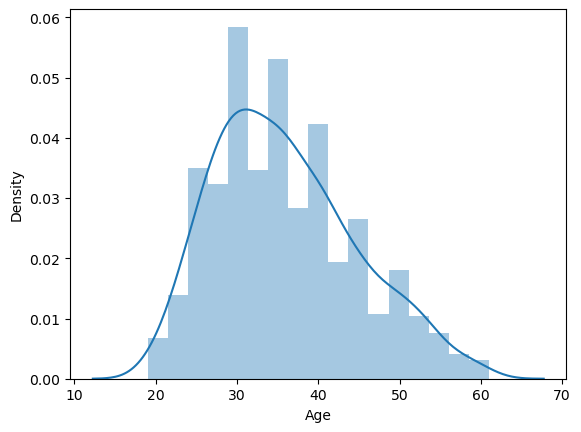

Axes(0.125,0.11;0.775x0.77)


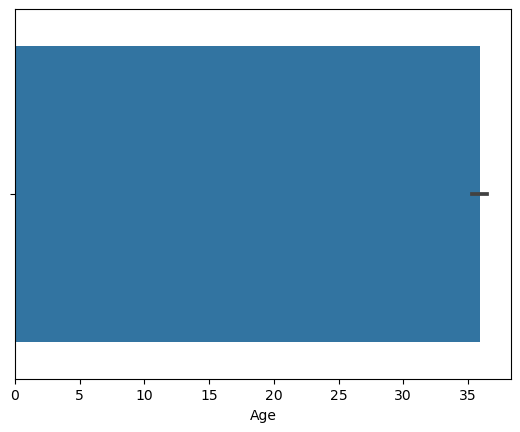

Area_Income
Axes(0.125,0.11;0.775x0.77)


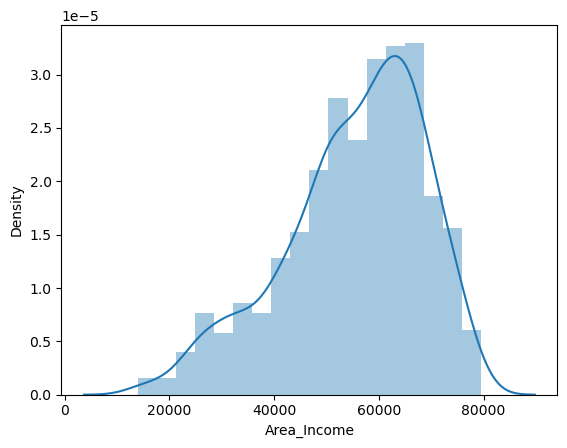

Axes(0.125,0.11;0.775x0.77)


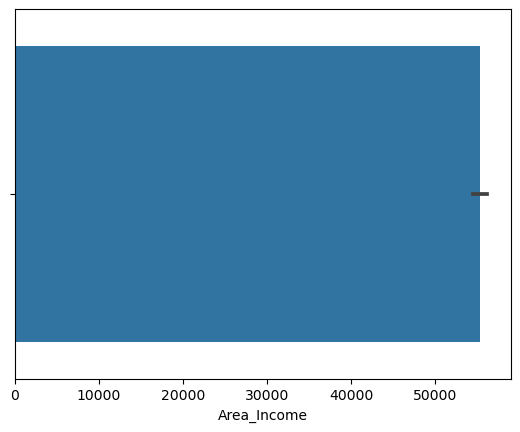

Daily_Internet_Usage
Axes(0.125,0.11;0.775x0.77)


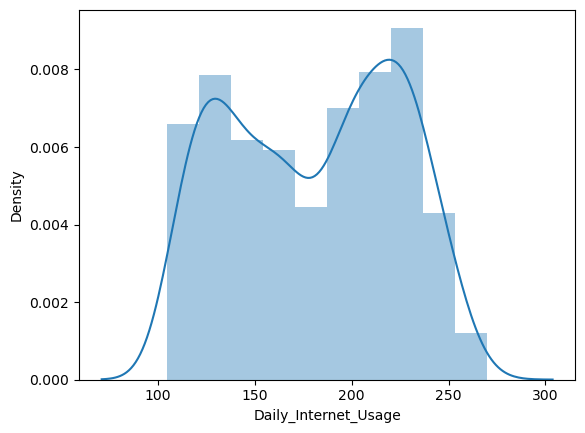

Axes(0.125,0.11;0.775x0.77)


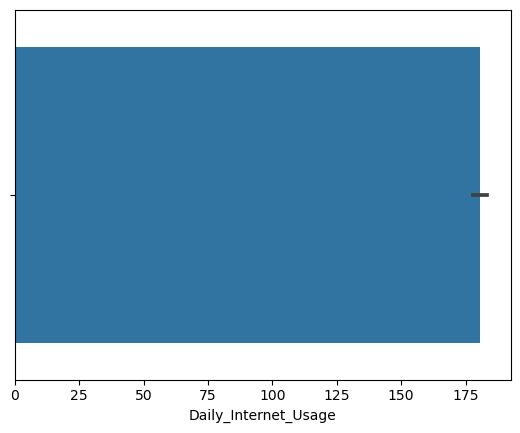

Gender
Axes(0.125,0.11;0.775x0.77)


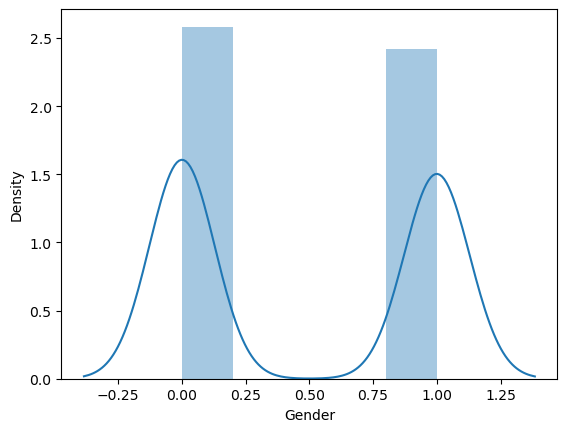

Axes(0.125,0.11;0.775x0.77)


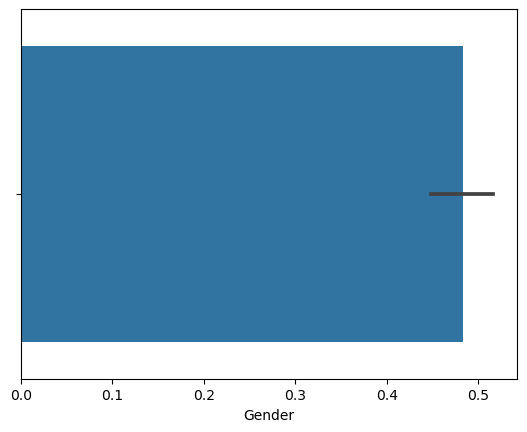

Clicked_on_Ad
Axes(0.125,0.11;0.775x0.77)


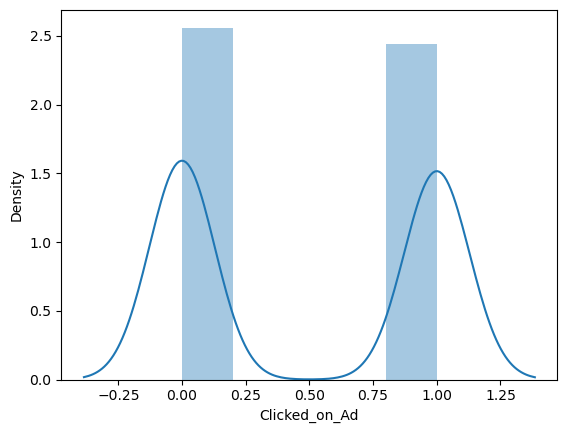

Axes(0.125,0.11;0.775x0.77)


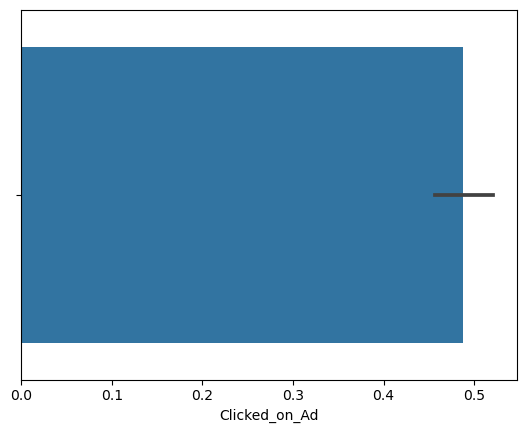

hour
Axes(0.125,0.11;0.775x0.77)


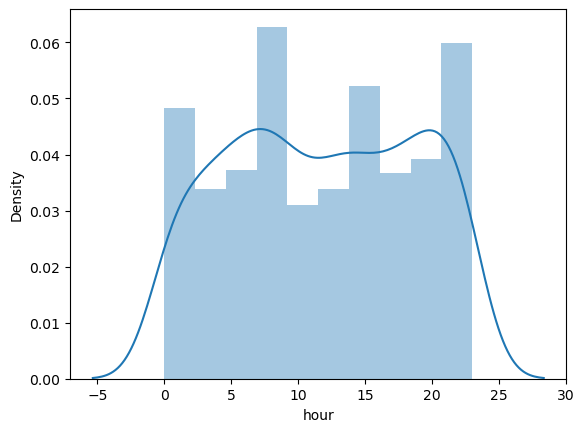

Axes(0.125,0.11;0.775x0.77)


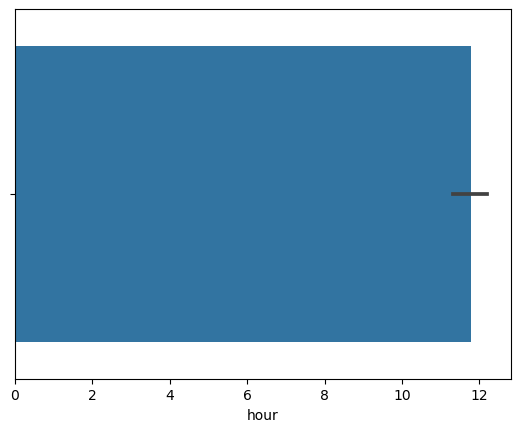

day
Axes(0.125,0.11;0.775x0.77)


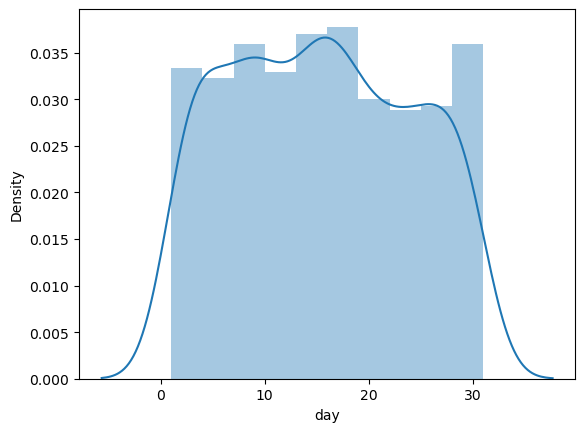

Axes(0.125,0.11;0.775x0.77)


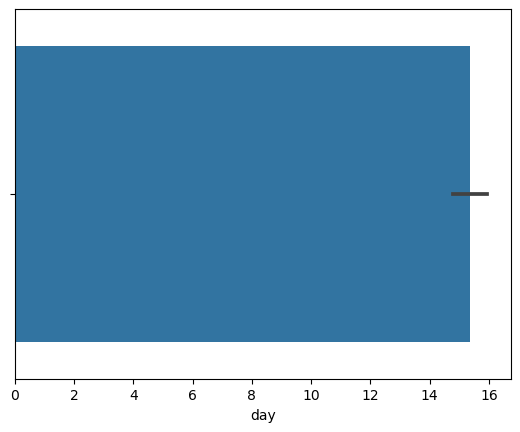

month
Axes(0.125,0.11;0.775x0.77)


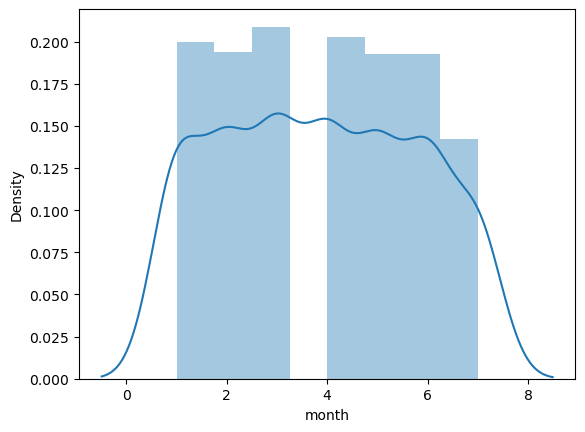

Axes(0.125,0.11;0.775x0.77)


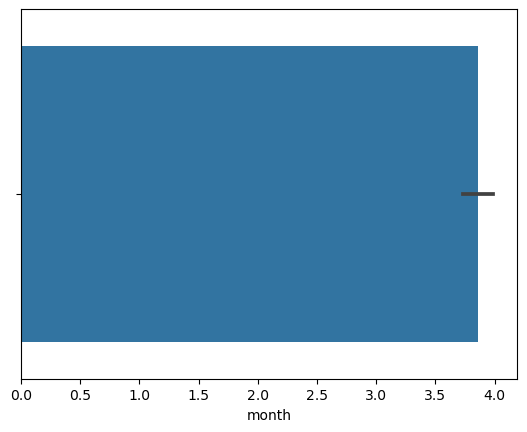

year
Axes(0.125,0.11;0.775x0.77)


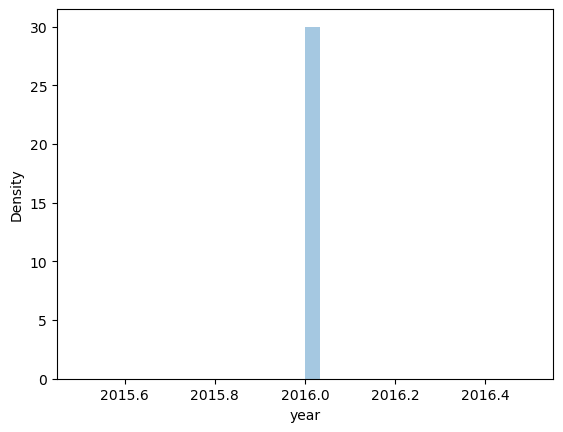

Axes(0.125,0.11;0.775x0.77)


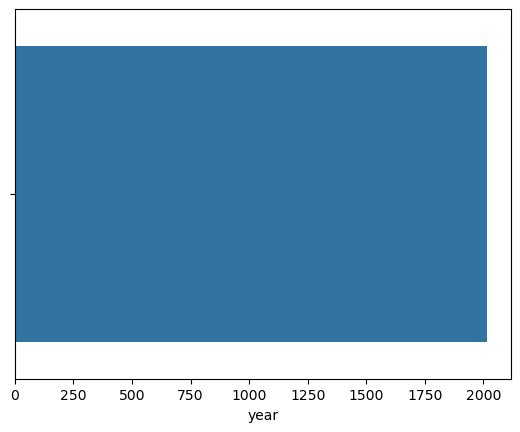

dayofweek
Axes(0.125,0.11;0.775x0.77)


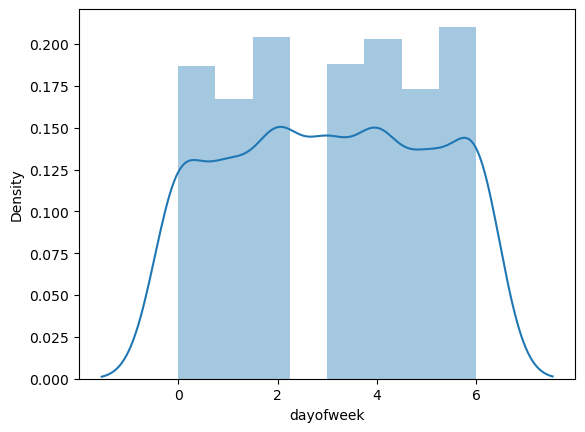

Axes(0.125,0.11;0.775x0.77)


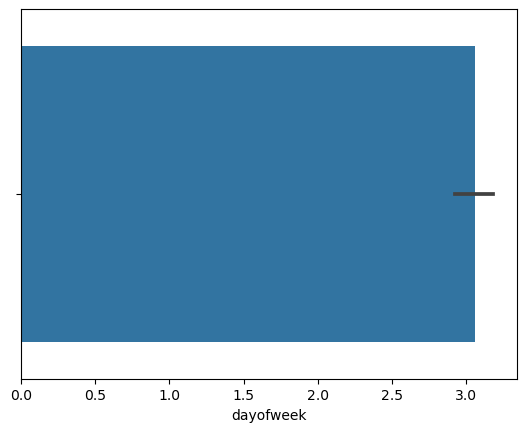

minutes
Axes(0.125,0.11;0.775x0.77)


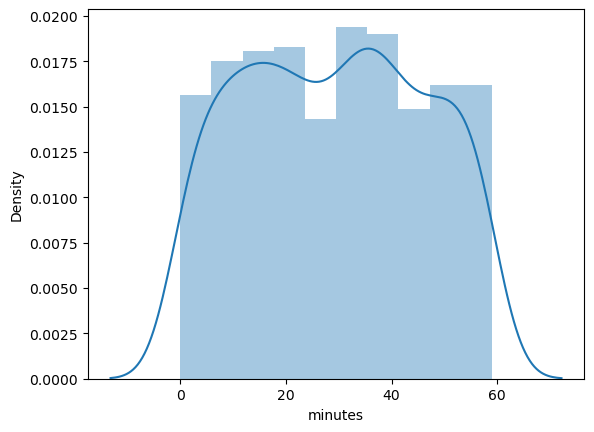

Axes(0.125,0.11;0.775x0.77)


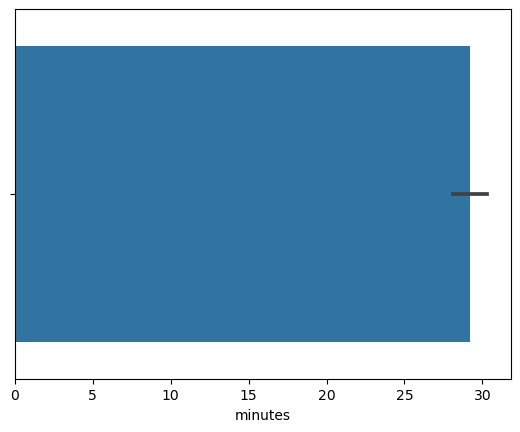

In [31]:
num=click.describe().columns.to_list()
for i in num:
    print(i)
    print(sns.distplot(click[i]))
    plt.show()
    print(sns.barplot(x=click[i]))
    plt.show()

### Analyzing categorical features

In [32]:
cat=click.describe(include='O').columns.to_list()

<Axes: xlabel='Clicked_on_Ad', ylabel='count'>

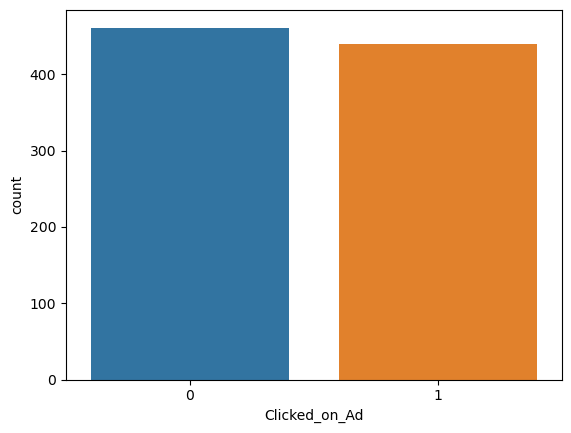

In [33]:
sns.countplot(x=click.Clicked_on_Ad)

### Age vs Clicked_on_Ad

In [34]:
click.Age.unique()

array([35, 31, 26, 29, 23, 33, 48, 30, 20, 49, 37, 24, 41, 36, 40, 52, 28,
       34, 22, 57, 53, 39, 46, 32, 25, 43, 45, 50, 47, 27, 42, 38, 54, 21,
       60, 55, 44, 58, 56, 51, 19, 59, 61])

In [35]:
click.groupby('Clicked_on_Ad').Age.mean()

Clicked_on_Ad
0    31.774403
1    40.239180
Name: Age, dtype: float64

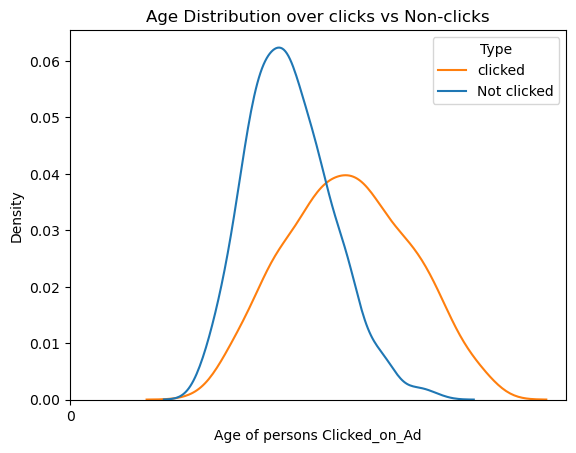

In [36]:
sns.kdeplot(x = 'Age',data = click,hue = 'Clicked_on_Ad',common_norm = False)
plt.xlabel('Age of persons Clicked_on_Ad')
plt.ylabel('Density')
plt.xticks(np.arange(0,1,5))
plt.title('Age Distribution over clicks vs Non-clicks')
plt.legend(title = 'Type', labels = ['clicked','Not clicked'])

The majority of individuals who clicked on ads are approximately 40 years old, indicating a significant preference within that age group for engaging with advertisements.



### Gender vs Clicked_on_Ad

In [37]:
click.Gender.unique()

array([0, 1])

In [38]:
click.groupby('Gender').Clicked_on_Ad.mean()

Gender
0    0.507527
1    0.466667
Name: Clicked_on_Ad, dtype: float64

Gender
0    51.666667
1    48.333333
Name: proportion, dtype: float64

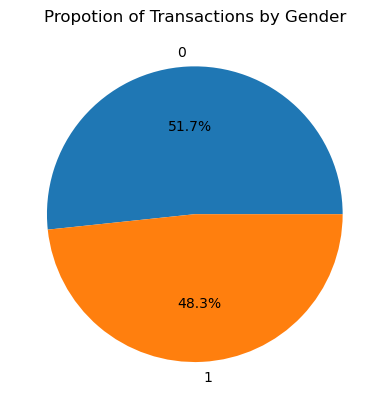

In [39]:
# Count the number of transactions for each gender

gender_count = click['Gender'].value_counts()
display(click['Gender'].value_counts(normalize = True) *100)

# Ploting Pie Chart

plt.pie(gender_count,labels = gender_count.index,autopct = '%1.1f%%')
plt.title('Propotion of Transactions by Gender')
plt.show()

In the dataset, there's a slightly higher proportion of females 51.7% has seen the ads compared to males 48.3%, indicating a relatively balanced engagement across genders.







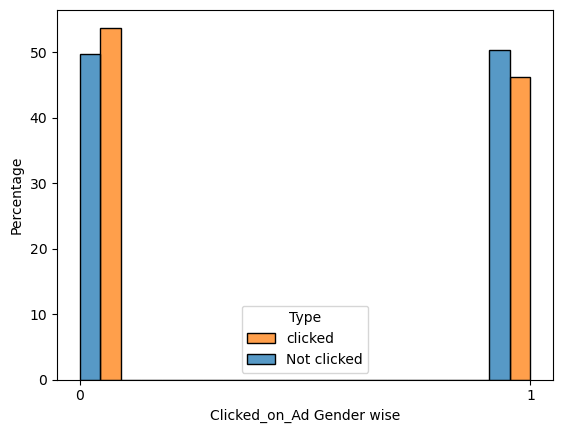

In [40]:
#Gender vs Fraud
sns.histplot(x = 'Gender',data = click,hue = 'Clicked_on_Ad',stat = 'percent',multiple = 'dodge',common_norm = False)
plt.xlabel('Clicked_on_Ad Gender wise')
plt.ylabel('Percentage')
plt.xticks(np.arange(0,2,1))
plt.legend(title = 'Type',labels = ['clicked','Not clicked'],loc='best')


### Daily_Time_Spent_on_Site vs Clicked_on_Ad

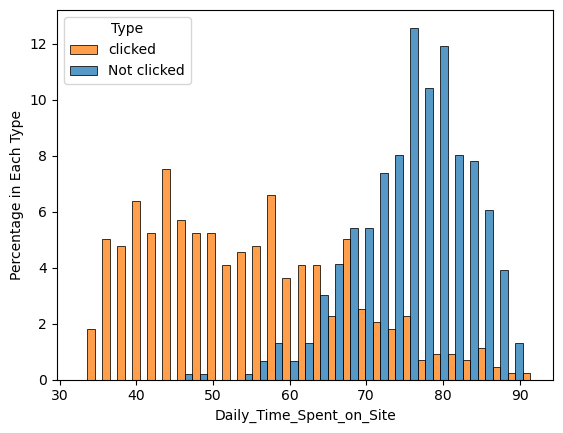

In [41]:
sns.histplot(x = 'Daily_Time_Spent_on_Site',data = click,hue = 'Clicked_on_Ad',stat = 'percent',multiple = 'dodge',common_norm = False,bins = 30)
plt.xlabel('Daily_Time_Spent_on_Site')
plt.ylabel('Percentage in Each Type')
plt.legend(title = 'Type', labels = ['clicked','Not clicked'])


Peolpe who clicks on add are more who spents time on site around 42 hours to 60 hrs

### Daily_Internet_Usage vs Clicked on Ad

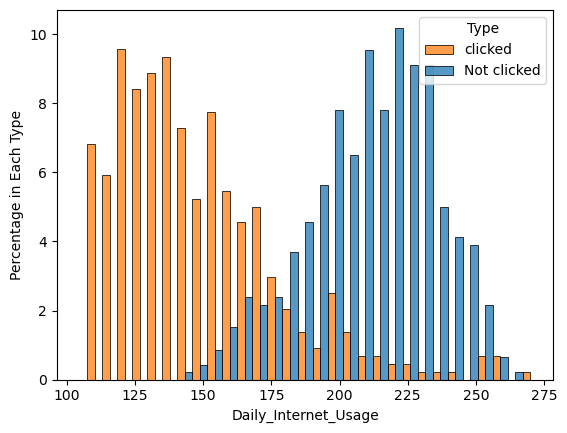

In [42]:
sns.histplot(x = 'Daily_Internet_Usage',data = click,hue = 'Clicked_on_Ad',stat = 'percent',multiple = 'dodge',common_norm = False,bins = 30)
plt.xlabel('Daily_Internet_Usage')
plt.ylabel('Percentage in Each Type')
plt.legend(title = 'Type', labels = ['clicked','Not clicked'])


### Bivariate Analysis

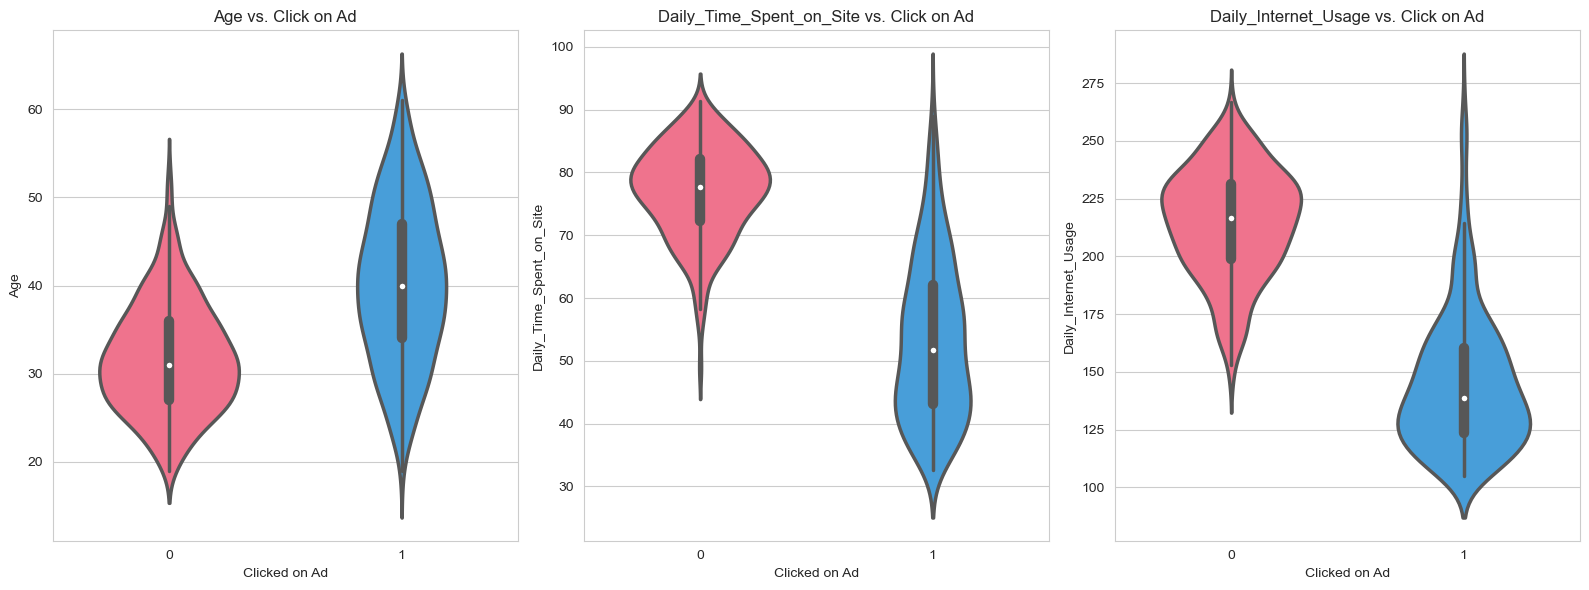

In [43]:
sns.set_style('whitegrid')
colors = ['#FF6384', '#36A2EB'] 
sns.set_palette(sns.color_palette(colors))
features = ['Age', 'Daily_Time_Spent_on_Site', 'Daily_Internet_Usage']
num_plots = len(features)
fig, axes = plt.subplots(1, num_plots, figsize=(16, 6))
for i, feature in enumerate(features):
    ax = axes[i]
    ax.set_title(f'{feature} vs. Click on Ad')
    sns.violinplot(x='Clicked_on_Ad', y=feature, data=click, linewidth=2.5, width=0.6, saturation=0.8, ax=ax)
    ax.set_xlabel('Clicked on Ad')
    ax.set_ylabel(feature)
plt.tight_layout()
plt.show()

Insight:

#### Age
1.the density of no is highest around age of 30, indicating that users in their 30s are less likely to click on ads.

2.the density of yes is highest around age of 40, indicating that users in their 40s are more likely to click on ads.

3.no distribution appears wider and shorter, indicating that it has a higher density and lower variablity.

4.yes distribution appears slimer and longer, indicating that it has a lower density and higher variability.

5.no distribution has a longer tail towards higher ages, indicating that it has a positive skew and has outlier.

#### Daily_Time_Spent_on_Site
1.the density of no is highest around minutes of 75, indicating that users who has daily spent around 75 minutes 

2.on internet are less likely to click on ads.

3.the density of yes is highest around minutes of 50, indicating that users who has daily spent around 50 minutes 
on internet are more likely to click on ads.

4.no distribution appears shorter, indicating that it has a lower variablity.

5.yes distribution appears longer, indicating that it has a higher variability.

6.no distribution has a longer tail towards lower minutes, indicating that it has a negative skew and has outlier.

7.yes distribution has a very long tail towards higher minutes, indicating that it has a high positive skew and has outlier.

#### Daily_Internet_Usage
1.the density of no is highest around minutes of 210, indicating that users who has daily spent around 210 minutes on internet are less likely to click on ads.

2.the density of yes is highest around minutes of 130, indicating that users who has daily spent around 130 minutes on internet are more likely to click on ads.

3.no distribution appears wider and shorter, indicating that it has a higher density and lower variablity.

4.yes distribution appears slimer and longer, indicating that it has a lower density and higher variability.

5.no distribution has a longer tail towards lower minutes, indicating that it has a negative skew and has outlier.

6.yes distribution has a longer tail towards higher minutes, indicating that it has a positive skew and has outlier.

### Area_Income vs Clicked_on_Ad

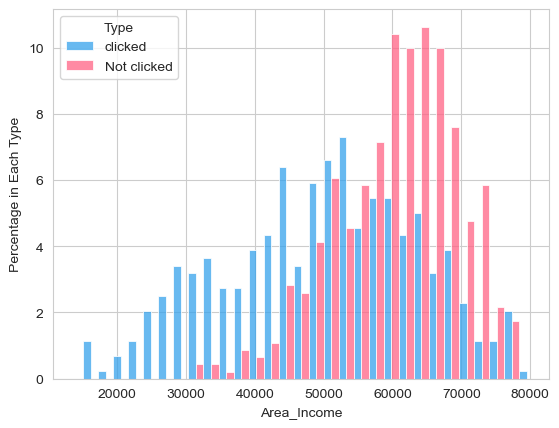

In [44]:
sns.histplot(x = 'Area_Income',data = click,hue = 'Clicked_on_Ad',stat = 'percent',multiple = 'dodge',common_norm = False,bins = 30)
plt.xlabel('Area_Income')
plt.ylabel('Percentage in Each Type')
plt.legend(title = 'Type', labels = ['clicked','Not clicked'])


### Country vs Clicked_on_Ad

In [45]:
click.Country.nunique()

234

In [46]:
click.groupby('Clicked_on_Ad').Country.max()

Clicked_on_Ad
0    Zimbabwe
1    Zimbabwe
Name: Country, dtype: object

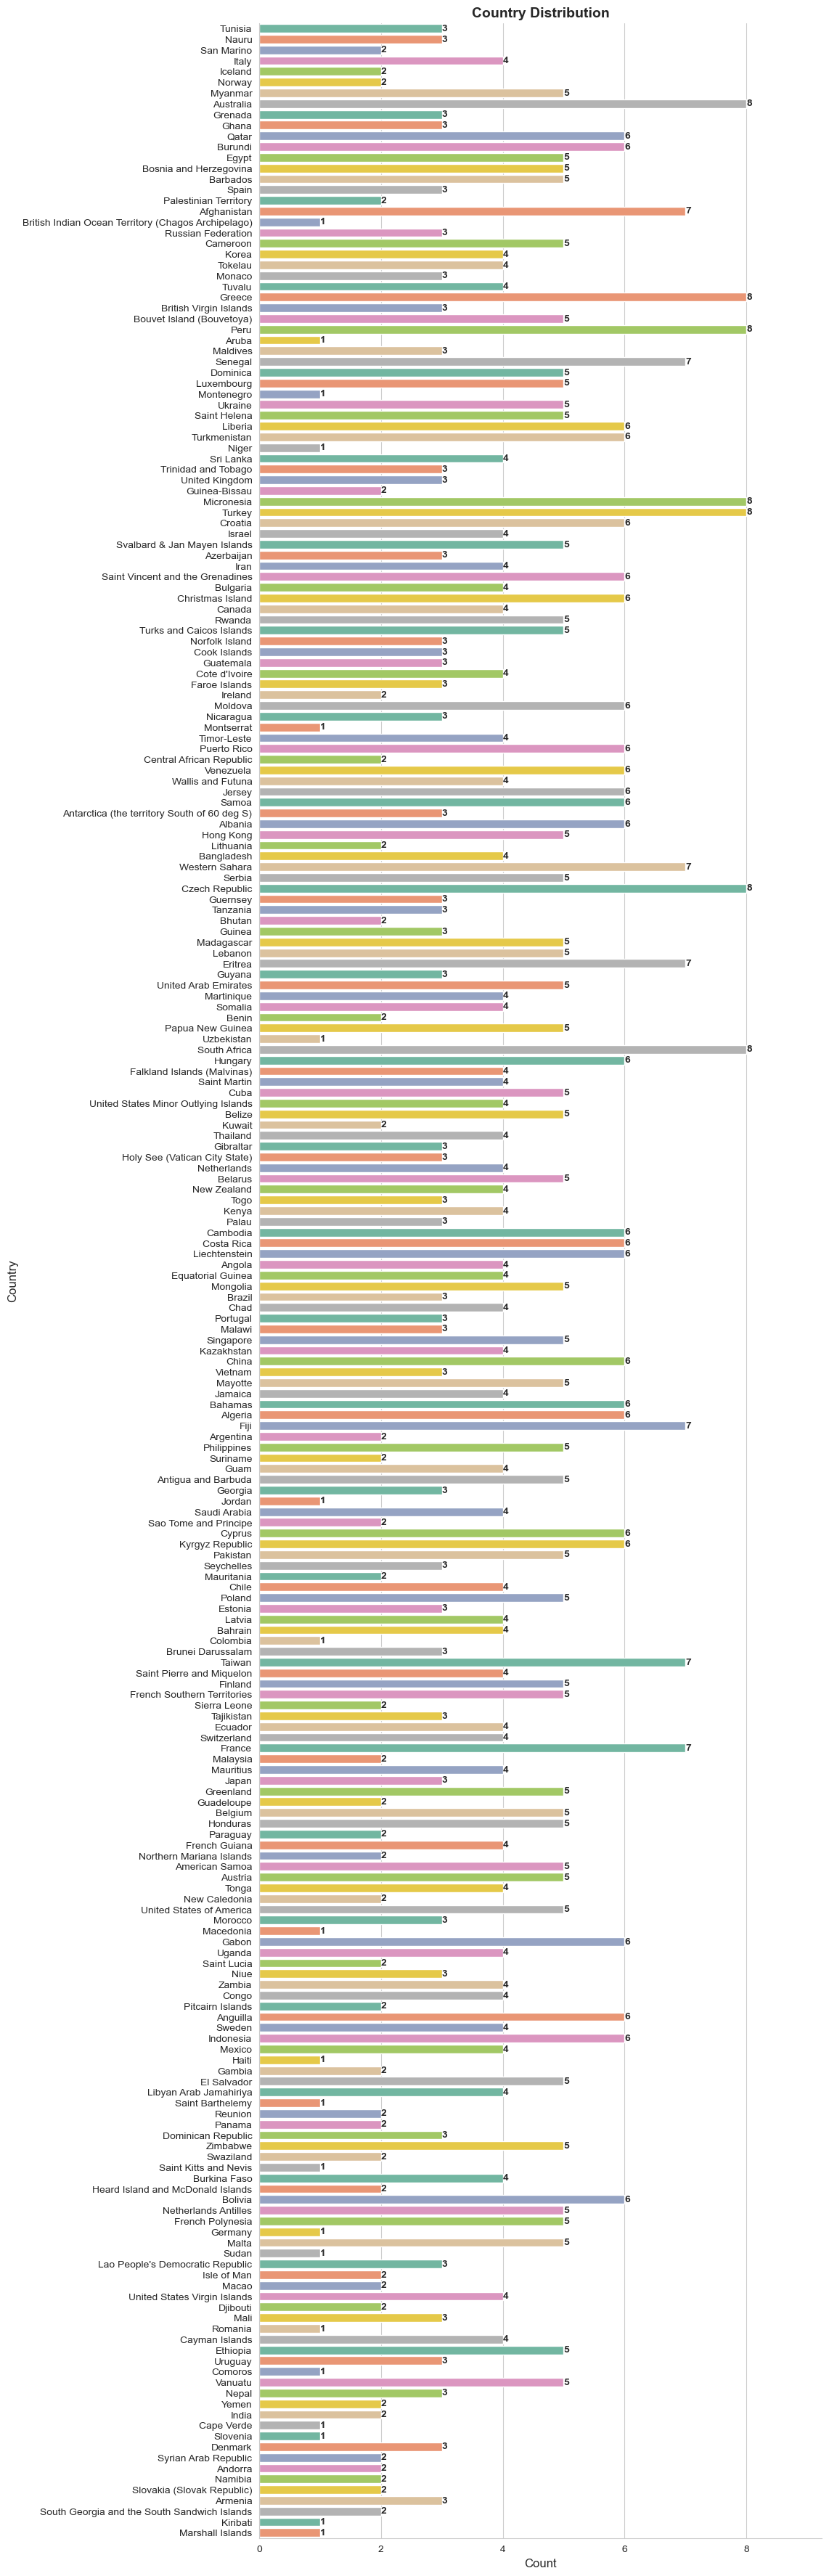

In [47]:
plt.figure(figsize=(10,45))
ax = sns.countplot(data=click, y='Country', palette='Set2')
sns.despine()
plt.title('Country Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Count', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

for p in ax.patches:
    width = p.get_width()
    ax.annotate(f'{int(width)}', (width, p.get_y() + p.get_height() / 2), ha='left', va='center', fontsize=10, fontweight='bold')
plt.xlim(0, ax.get_xlim()[1] * 1.1)
plt.show()


Australia,Myanmar,Greece,Peru,Turkey,Czech Republic,Hungary contributes the most with 8 users.

Aruba,Montenegro, Niger and others contributes the less with 1 users.

### Cyclicality of Clicked on Ads
How do Ads distribute on the temporal spectrum? Is there an hourly, monthly, or seasonal trend? We can use the transaction time column to answer this question.

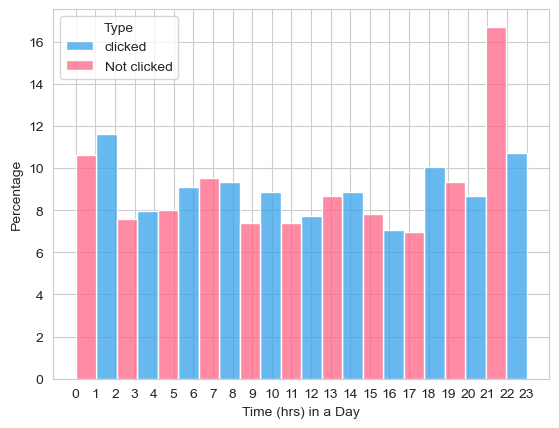

In [48]:
#time in a day vs fraud
sns.histplot(data=click, x="hour", hue="Clicked_on_Ad", common_norm=False,stat='percent',multiple='dodge')
plt.xlabel('Time (hrs) in a Day')
plt.ylabel('Percentage')
plt.xticks(np.arange(0,24,1))
plt.legend(title='Type', labels=['clicked', 'Not clicked'])
plt.show()

The number of clicks on ads remains consistent across most hours, except during the late-night period from 11 PM to 1 AM, where there is a noticeable increase in engagement.

### Weekly Trend

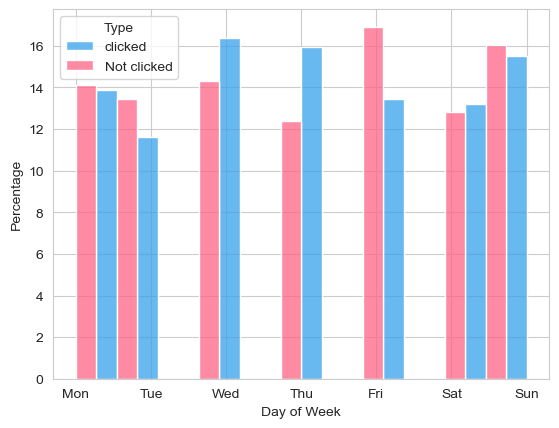

In [49]:
ax = sns.histplot(data = click,x = 'dayofweek',hue = 'Clicked_on_Ad', common_norm = False,stat = 'percent',multiple = 'dodge')
plt.xticks(np.arange(0,7,1))
ax.set_xticklabels([ 'Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
plt.xlabel('Day of Week')
plt.ylabel('Percentage')
plt.legend(title='Type', labels=['clicked', 'Not clicked'])

The number of clicks on ads remains consistent across most days. But silghtly high on wednesday

## MONTHLY TREND 

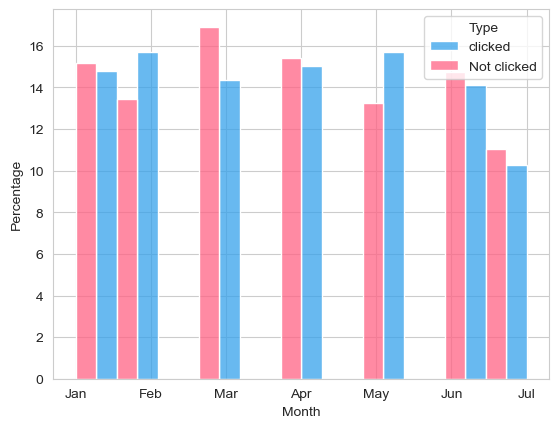

In [50]:
ax = sns.histplot(data=click, x="month", hue="Clicked_on_Ad", common_norm=False,stat='percent',multiple='dodge')
ax.set_ylabel('Percentage')
ax.set_xlabel('Month')
plt.xticks(np.arange(1,8,1))
ax.set_xticklabels(["Jan","Feb","Mar","Apr","May","Jun","Jul"])
plt.legend(title='Type', labels=['clicked', 'Not clicked'])

The number of clicks on ads remains consistent across most of the months, expect July which is only 10%. 

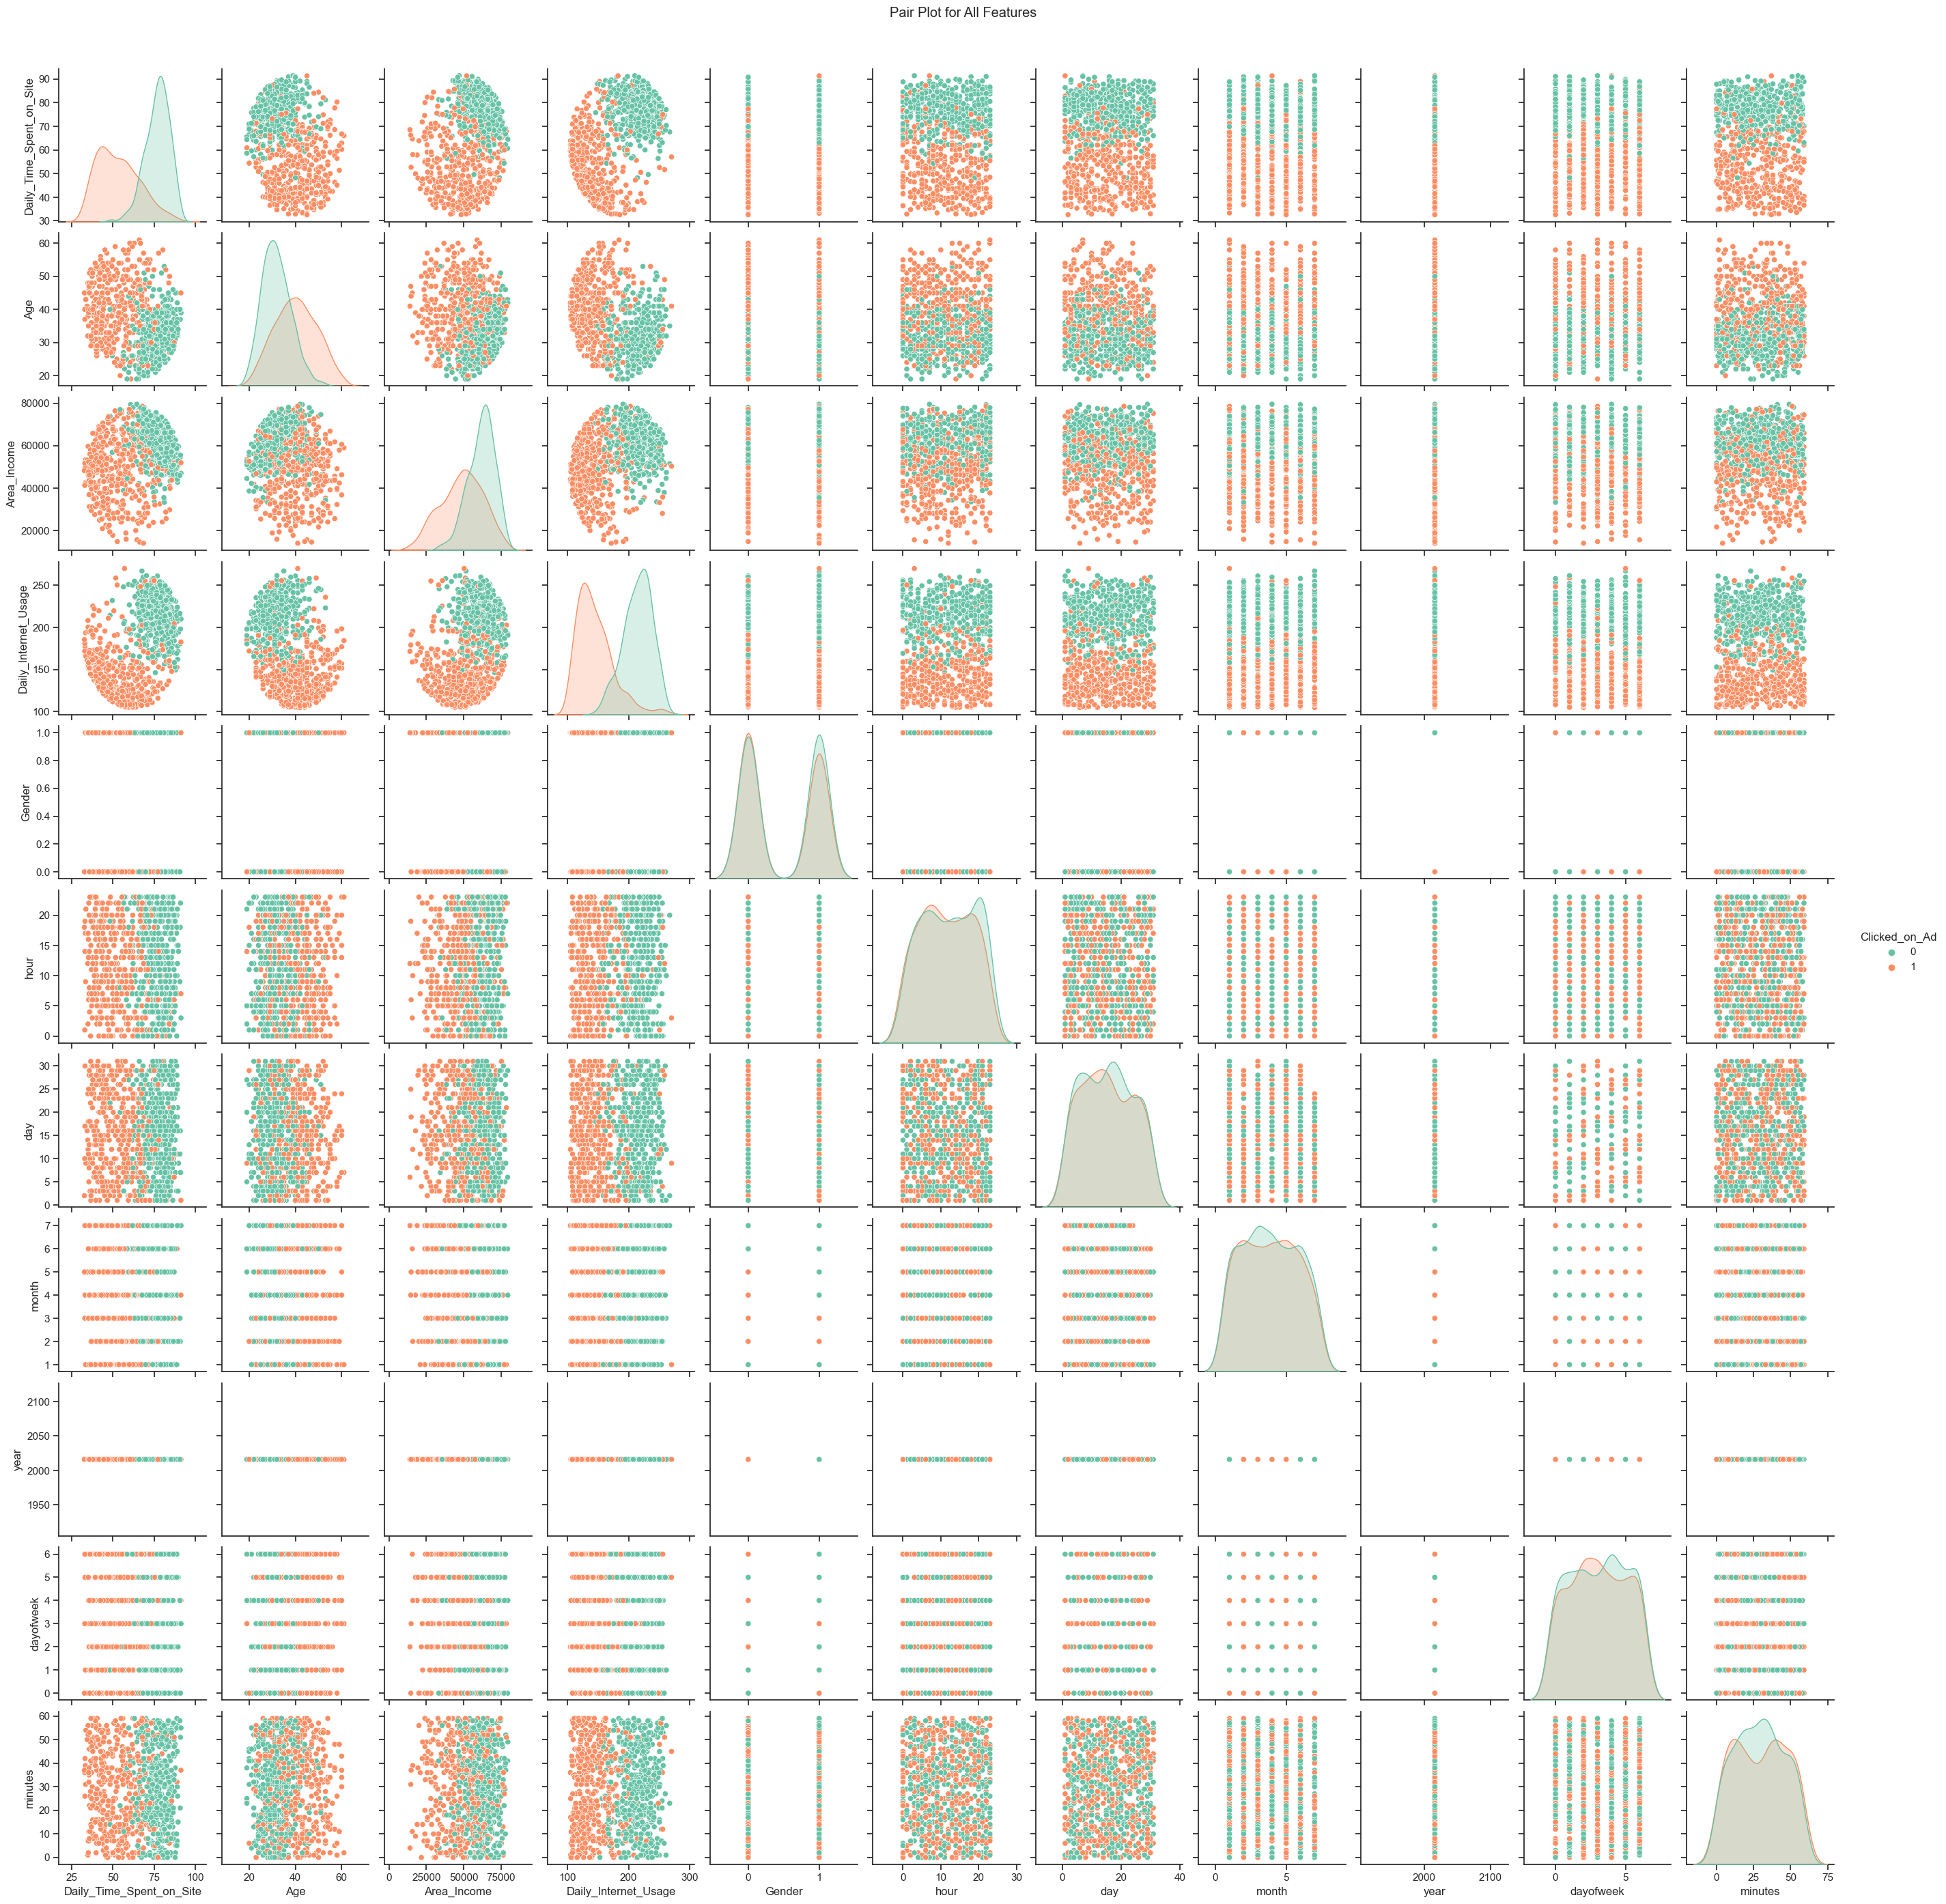

In [51]:
# Set style and color palette
sns.set(style="ticks", palette="Set2")

# Create pair plot
sns.pairplot(data=click, hue='Clicked_on_Ad')

# Set plot title
plt.suptitle('Pair Plot for All Features', y=1.02)

# Show the plot
plt.show()


### Now will perform heat map for numerical features

In [226]:
cols = click.describe().columns.to_list() 

<Axes: >

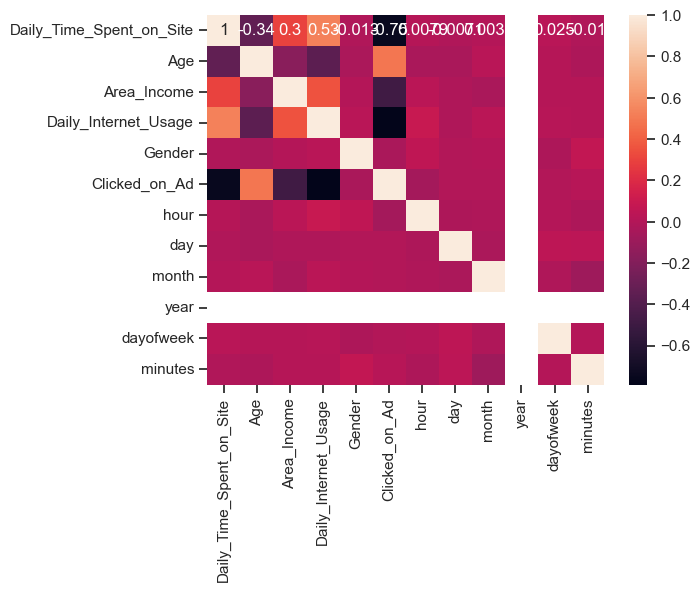

In [227]:
sns.heatmap(click[cols].corr(),annot = True)

In [228]:
non_num_cols = ['hour','day','month','year','dayofweek','minutes']
cols = click.describe().columns.to_list() 
num_cols = [i  for i in cols if i not in non_num_cols]

<Axes: >

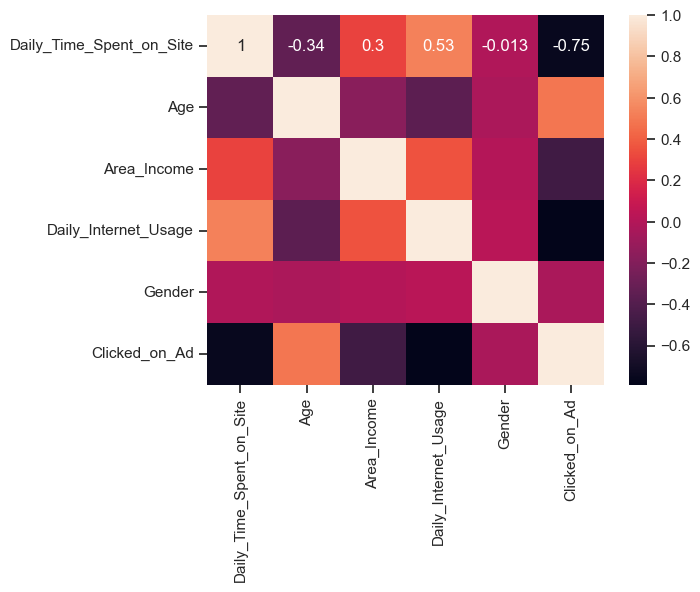

In [229]:
sns.heatmap(click[num_cols].corr(),annot = True)

In [230]:
click.head(2)

Daily_Time_Spent_on_Site  Age  Area_Income  Daily_Internet_Usage  \
0                     68.95   35     61833.90                256.09   
1                     80.23   31     68441.85                193.77   

                        Ad_Topic_Line         City  Gender  Country  \
0  Cloned 5thgeneration orchestration  Wrightburgh       0  Tunisia   
1  Monitored national standardization    West Jodi       1    Nauru   

   Clicked_on_Ad  hour  day  month  year  dayofweek  minutes  
0              0     0   27      3  2016          6       53  
1              0     1    4      4  2016          0       39

In [231]:
click.Ad_Topic_Line.nunique()

900

In [232]:
click.Country.nunique()

234

In [233]:
click.City.nunique()

875

In [234]:
df=click.drop(['Ad_Topic_Line','Country','City','dayofweek'],axis=1)
df

Daily_Time_Spent_on_Site  Age  Area_Income  Daily_Internet_Usage  Gender  \
0                       68.95   35     61833.90                256.09       0   
1                       80.23   31     68441.85                193.77       1   
2                       69.47   26     59785.94                236.50       0   
3                       74.15   29     54806.18                245.89       1   
4                       68.37   35     73889.99                225.58       0   
..                        ...  ...          ...                   ...     ...   
895                     80.99   26     35521.88                207.53       1   
896                     78.84   32     62430.55                235.29       1   
897                     77.36   41     49597.08                115.79       0   
898                     55.46   37     42078.89                108.10       0   
899                     35.66   45     46197.59                151.72       0   

     Clicked_on_Ad  hour  day  month  year  minutes  
0                0     0   27      3  2016       53  
1                0     1    4      4  2016       39  
2                0    20   13      3  2016       35  
3                0     2   10      1  2016       31  
4                0     3    3      6  2016       36  
..             ...   ...  ...    ...   ...      ...  
895              0     3   10      6  2016       56  
896              0     9    9      4  2016       26  
897              1     6   26      2  2016        0  
898              1    23   21      2  2016        7  
899              1    14   29      4  2016        8  

[900 rows x 11 columns]

In [235]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily_Time_Spent_on_Site  900 non-null    float64
 1   Age                       900 non-null    int64  
 2   Area_Income               900 non-null    float64
 3   Daily_Internet_Usage      900 non-null    float64
 4   Gender                    900 non-null    int64  
 5   Clicked_on_Ad             900 non-null    int64  
 6   hour                      900 non-null    int32  
 7   day                       900 non-null    int32  
 8   month                     900 non-null    int32  
 9   year                      900 non-null    int32  
 10  minutes                   900 non-null    int32  
dtypes: float64(3), int32(5), int64(3)
memory usage: 59.9 KB


#### All are numeric dtypes no need to do encoding

# Model Building

In [236]:
df.head(2)

Daily_Time_Spent_on_Site  Age  Area_Income  Daily_Internet_Usage  Gender  \
0                     68.95   35     61833.90                256.09       0   
1                     80.23   31     68441.85                193.77       1   

   Clicked_on_Ad  hour  day  month  year  minutes  
0              0     0   27      3  2016       53  
1              0     1    4      4  2016       39

### Splitting the DataFrame

In [237]:
X=df.drop('Clicked_on_Ad',axis=1)
y=df.Clicked_on_Ad

In [238]:
X.head(2)

Daily_Time_Spent_on_Site  Age  Area_Income  Daily_Internet_Usage  Gender  \
0                     68.95   35     61833.90                256.09       0   
1                     80.23   31     68441.85                193.77       1   

   hour  day  month  year  minutes  
0     0   27      3  2016       53  
1     1    4      4  2016       39

In [239]:
y

0      0
1      0
2      0
3      0
4      0
      ..
895    0
896    0
897    1
898    1
899    1
Name: Clicked_on_Ad, Length: 900, dtype: int64

### Train test spilt

In [240]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

print('X_train.shape:',X_train.shape, ' X_test.shape:',X_test.shape,'y_train.shape:', y_train.shape,'y_test.shape', y_test.shape)

X_train.shape: (630, 10)  X_test.shape: (270, 10) y_train.shape: (630,) y_test.shape (270,)


### Feature engineering 

### Scaling

In [241]:
#StandardScaler
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

### Logistic regression

In [242]:
#Logistic Regression
lr=LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()


Logistic Regression Classifier :
Accuracy_train: 0.973015873015873
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       307
           1       0.98      0.97      0.97       323

    accuracy                           0.97       630
   macro avg       0.97      0.97      0.97       630
weighted avg       0.97      0.97      0.97       630


Logistic Regression Classifier :
Accuracy_test: 0.9851851851851852
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       154
           1       1.00      0.97      0.98       116

    accuracy                           0.99       270
   macro avg       0.99      0.98      0.98       270
weighted avg       0.99      0.99      0.99       270



Text(0.5, 1.0, 'Confusion Matrix- Logistic Regression Classifier ')

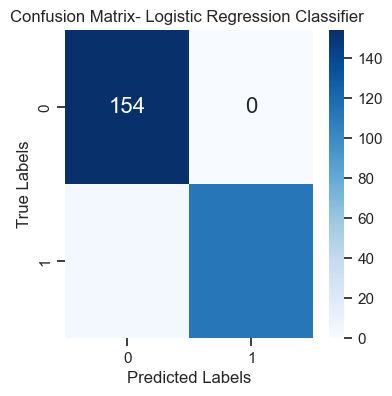

In [243]:
y_train_pred=lr.predict(X_train)
y_test_pred=lr.predict(X_test)

y_train_pred_proba=lr.predict_proba(X_train)
y_test_pred_proba=lr.predict_proba(X_test)[:,1]

accuracy_train=accuracy_score(y_train,y_train_pred)
accuracy_test=accuracy_score(y_test,y_test_pred)

cm_train=confusion_matrix(y_train,y_train_pred)
cm_test=confusion_matrix(y_test,y_test_pred)

cr_train=classification_report(y_train,y_train_pred)
cr_test=classification_report(y_test,y_test_pred)

print("\nLogistic Regression Classifier :")
print(f"Accuracy_train: {accuracy_train}")
print("Classification Report:")
print(classification_report(y_train,y_train_pred))

print("\nLogistic Regression Classifier :")
print(f"Accuracy_test: {accuracy_test}")
print("Classification Report:")
print(classification_report(y_test, y_test_pred))


plt.figure(figsize=(4, 4))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', annot_kws={'size': 16})
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix- Logistic Regression Classifier ')

### Decision Tree

In [244]:
# Setting up the parameters in dictionary of lists format, in order to find which parameter provides best results

Parameters = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [ 5, 10, 15, 20],
    'min_samples_split': [ 5, 10],
 }


# Initializing the algorithm
DT = DecisionTreeClassifier()

# Performing grid search, which finds the appropriate parameter iteratively.
grid_search = GridSearchCV( DT, Parameters, cv = 5 )
grid_search.fit(X_train ,y_train)
Params = grid_search.best_params_

# Printing the best parameters 
print("Best Hyperparameters: ", grid_search.best_params_)
print("\nBest Accuracy Score: ", grid_search.best_score_)

Best Hyperparameters:  {'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 10}

Best Accuracy Score:  0.9492063492063492



Decision Tree Classifier:
Accuracy_train: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       307
           1       1.00      1.00      1.00       323

    accuracy                           1.00       630
   macro avg       1.00      1.00      1.00       630
weighted avg       1.00      1.00      1.00       630


Decision Tree Classifier :
Accuracy_test: 0.937037037037037
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.94       154
           1       0.93      0.92      0.93       116

    accuracy                           0.94       270
   macro avg       0.94      0.94      0.94       270
weighted avg       0.94      0.94      0.94       270



Text(0.5, 1.0, 'Confusion Matrix- Logistic Regression Classifier ')

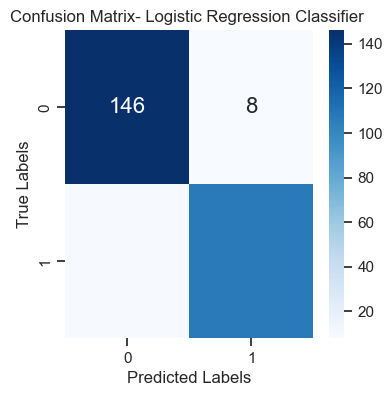

In [245]:
DT.fit(X_train,y_train)

y_train_preddt=DT.predict(X_train)
y_test_preddt=DT.predict(X_test)

y_train_pred_probadt=DT.predict_proba(X_train)
y_test_pred_probadt=DT.predict_proba(X_test)[:,1]

accuracy_traindt=accuracy_score(y_train,y_train_preddt)
accuracy_testdt=accuracy_score(y_test,y_test_preddt)

cm_traindt=confusion_matrix(y_train,y_train_preddt)
cm_testdt=confusion_matrix(y_test,y_test_preddt)

cr_traindt=classification_report(y_train,y_train_preddt)
cr_testdt=classification_report(y_test,y_test_preddt)

print("\nDecision Tree Classifier:")
print(f"Accuracy_train: {accuracy_traindt}")
print("Classification Report:")
print(classification_report(y_train,y_train_preddt))

print("\nDecision Tree Classifier :")
print(f"Accuracy_test: {accuracy_testdt}")
print("Classification Report:")
print(classification_report(y_test, y_test_preddt))


plt.figure(figsize=(4, 4))
sns.heatmap(cm_testdt, annot=True, fmt='d', cmap='Blues', annot_kws={'size': 16})
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix- Logistic Regression Classifier ')

### Random Forest

In [246]:
# Setting up the parameters in dictionary of lists format, in order to find which parameter provides best results
Parameters = {
    'n_estimators': [ 100 , 300 , 500 ], # Number of trees in the forest
    'max_depth': [None, 5 , 10 , 15 ], # Maximum depth of each tree
    'min_samples_split': [ 5 , 10 , 15]  # Minimum number of samples required to split an internal node    
}

# Create a RandomForestClassifier instance
rf = RandomForestClassifier ( )
# Perform grid search with cross-validation
grid_search = GridSearchCV ( RF, Parameters, cv = 5)
grid_search.fit ( X_train ,y_train )
Params = grid_search.best_params_
# Training model for each combination of the parameters
print("Best Hyperparameters: ", grid_search.best_params_)
print("\nBest Accuracy Score: ", grid_search.best_score_)

Best Hyperparameters:  {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 300}

Best Accuracy Score:  0.965079365079365



Random Forest Classifier:
Accuracy_train: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       307
           1       1.00      1.00      1.00       323

    accuracy                           1.00       630
   macro avg       1.00      1.00      1.00       630
weighted avg       1.00      1.00      1.00       630


Random Forest Classifier :
Accuracy_test: 0.9666666666666667
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       154
           1       0.98      0.94      0.96       116

    accuracy                           0.97       270
   macro avg       0.97      0.96      0.97       270
weighted avg       0.97      0.97      0.97       270



Text(0.5, 1.0, 'Confusion Matrix- Logistic Regression Classifier ')

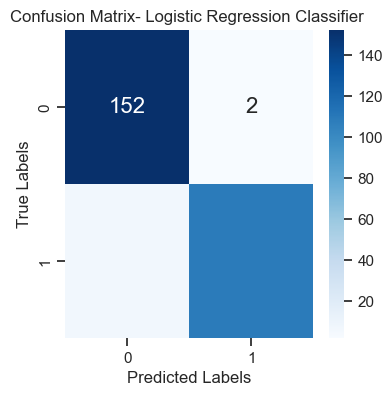

In [247]:
rf.fit(X_train,y_train)

y_train_predrf=rf.predict(X_train)
y_test_predrf=rf.predict(X_test)

y_train_pred_probarf=rf.predict_proba(X_train)
y_test_pred_probarf=rf.predict_proba(X_test)[:,1]

accuracy_trainrf=accuracy_score(y_train,y_train_predrf)
accuracy_testrf=accuracy_score(y_test,y_test_predrf)

cm_trainrf=confusion_matrix(y_train,y_train_predrf)
cm_testrf=confusion_matrix(y_test,y_test_predrf)

cr_trainrf=classification_report(y_train,y_train_predrf)
cr_testrf=classification_report(y_test,y_test_predrf)

print("\nRandom Forest Classifier:")
print(f"Accuracy_train: {accuracy_trainrf}")
print("Classification Report:")
print(classification_report(y_train,y_train_predrf))

print("\nRandom Forest Classifier :")
print(f"Accuracy_test: {accuracy_testrf}")
print("Classification Report:")
print(classification_report(y_test, y_test_predrf))


plt.figure(figsize=(4, 4))
sns.heatmap(cm_testrf, annot=True, fmt='d', cmap='Blues', annot_kws={'size': 16})
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix- Logistic Regression Classifier ')

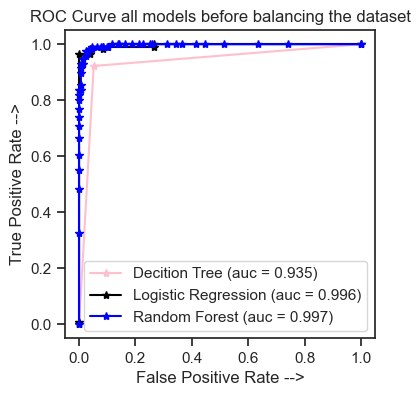

In [248]:
from sklearn.metrics import roc_curve, auc

# Predict probabilities on the non-oversampled test set (Logistic Regression)
y_test_proba = lr.predict_proba(X_test)[:, 1]
# Calculate ROC curve and AUC-ROC score for non-oversampled model
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_test_proba)
auc_lr = roc_auc_score(y_test, y_test_proba)

# Predict probabilities on the non-oversampled test set (Random Forest)
y_test_probarf = rf.predict_proba(X_test)[:, 1]
# Calculate ROC curve and AUC-ROC score for non-oversampled model
fpr_rf, tpr_rf, thresholds_rf= roc_curve(y_test, y_test_probarf)
auc_rf = roc_auc_score(y_test, y_test_probarf)

# Predict probabilities on the non-oversampled test set (Decision Tree)
y_test_probadt = DT.predict_proba(X_test)[:, 1]
# Calculate ROC curve and AUC-ROC score for non-oversampled model
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_test_probadt)
auc_dt = roc_auc_score(y_test, y_test_probadt)

plt.figure(figsize=(4, 4), dpi=100)
plt.plot(fpr_dt, tpr_dt, marker='*',color='pink' ,label='Decition Tree (auc = %0.3f)' % auc_dt)
plt.plot(fpr_lr, tpr_lr, marker='*',color='black' ,label='Logistic Regression (auc = %0.3f)' % auc_lr)
plt.plot(fpr_rf, tpr_rf, marker='*',color='blue' ,label='Random Forest (auc = %0.3f)' % auc_rf)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')
plt.title('ROC Curve all models before balancing the dataset')
plt.legend(loc='lower right')
plt.legend()
plt.show()
